In [206]:
# set up autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [207]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad

# Simple poisson process simulation

In [208]:
rho_max = 1
def rho(x, y):
    return np.exp(-x**2 - y**2)

In [209]:
X_BOUNDS = (-2, 2)
Y_BOUNDS = (-2, 2)
_rho_up_lim = lambda x: Y_BOUNDS[1]
_rho_low_lim = lambda x: Y_BOUNDS[0]

mu, err_est = dblquad(rho, X_BOUNDS[0], X_BOUNDS[1], _rho_low_lim, _rho_up_lim)
n = 0

while n == 0:
    n = np.random.poisson(mu)
    
n = 100000
    
print(f"Number of points being simulated: {n}")

Number of points being simulated: 100000


In [210]:
def pdf(x, y):
    return rho(x, y) / mu

points = list()
discarded_points = list()

for i in range(n):
    # generate homogeneous poisson sample
    x = np.random.uniform(*X_BOUNDS)
    y = np.random.uniform(*Y_BOUNDS)
    
    # accept or reject
    r_u = np.random.uniform(0, rho_max)
    p_u = pdf(x, y) / rho_max  # wrong. Should be rho not pdf
    
    if p_u >= r_u:
        points.append((x, y))
    else:
        discarded_points.append((x, y))

print(f"Number of accepted points: {len(points)}")
print(f"Number of discarded points: {len(discarded_points)}")
print(f"Discarded {100 * (1 - (len(points) / n)):.2f}% of points")

Number of accepted points: 6212
Number of discarded points: 93788
Discarded 93.79% of points


In [211]:
N_SAMPLES = 100

img_x = np.linspace(*X_BOUNDS, N_SAMPLES)
img_y = np.linspace(*Y_BOUNDS, N_SAMPLES)
img = np.zeros((N_SAMPLES, N_SAMPLES))

for i, x in enumerate(img_x):
    for j, y in enumerate(img_y):
        img[i, j] = pdf(x, y)

/tmp/ipykernel_91569/2701108942.py:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, s=0.5, c=(0.6, 0.6, 1), alpha=0.7)


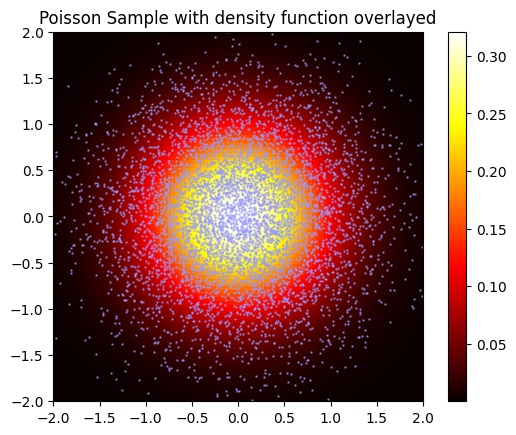

[]

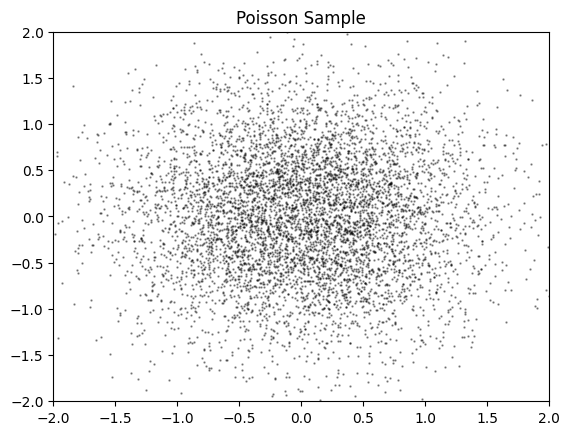

In [212]:
cb = plt.imshow(img, extent=[*X_BOUNDS, *Y_BOUNDS], cmap='hot')
plt.colorbar(cb)
x, y = zip(*points)
plt.scatter(x, y, s=0.5, c=(0.6, 0.6, 1), alpha=0.7)
plt.title("Poisson Sample with density function overlayed")
plt.show()

plt.scatter(x, y, s=0.5, c='k', alpha=0.4)
plt.ylim(*Y_BOUNDS)
plt.xlim(*X_BOUNDS)
plt.title("Poisson Sample")
plt.plot()